# Mount your drive (in case you want to save some results) + GitHub directory
* Please use GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Git
!git clone https://github.com/Hesam-92-19/Transfer_Learning_SHM



Mounted at /content/drive
Cloning into 'Transfer_Learning_SHM'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 1.47 MiB | 2.46 MiB/s, done.


# Download + Unzip data files
## Codes are updated to support downloading files from Zenodo after Google canceled out its free educational storage.

In [ ]:
# Download the Benchmarks and required data as ZIP files 
import shutil
from zipfile import ZipFile
import urllib
!pip install patool
AD1='https://zenodo.org/api/records/10827225/files-archive'
urllib.request.urlretrieve(AD1, 'Files.zip')

## Extracting the ZIP files
with ZipFile('Files.zip', 'r') as f:
  f.extractall('Files')


import patoolib
rar_file = 'Files/DatasetZ.part01.rar'
destination_folder = './'
patoolib.extract_archive(rar_file, outdir=destination_folder)
shutil.move('./DatasetZ', './Dataset')

with ZipFile('./Files/DetectorsZ.zip', 'r') as f:
  f.extractall('./Detectors')

shutil.rmtree('./Files')

# Utils Notebook is called in this cell, containing all the required functions to carry out the TL.

In [ ]:
import sys
Folder_N='Test'
path_M = "/content/"
sys.path.append(path_M)
%cd /content/Transfer_Learning_SHM
%run Utils.ipynb
%cd

## Select your precision level (Float 10^-40 (max S=40), Double 10^-80 (max S=80))
#Prec='Float'
#Precision=40
Prec='Double'
Precision=80
torch.set_default_tensor_type('torch.cuda.'+Prec+'Tensor')



/content/Transfer_Learning_SHM
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/root


# Source Detector selection


In [ ]:
SourceK()
NK()
WK()

interactive(children=(Dropdown(description='Source Class', options=('Yellow', 'QUGS', 'Z24'), style=Descriptio…

interactive(children=(Dropdown(description='Source N', options=('15', '10', '6'), style=DescriptionStyle(descr…

interactive(children=(Dropdown(description='Source W', options=('2000', '1000', '500'), style=DescriptionStyle…

# Source Detector
* Load Source Detector and its Spectrum


In [ ]:
exec('D = CustomNeuralNetworkS%s().to(device)'%(str(N)))
checkpoint =torch.load(path_M+'Detectors/'+Source[0]+'D1S'+str(NS_D)+'_'+str(WS_D)+'.pth')
D.load_state_dict(checkpoint['D'].state_dict())
Spec=checkpoint['Spec']


# Select Taget
* If you select the Traget as Source, then the Source Detector performance on it domain is later plotted

In [ ]:
SourceKT()

interactive(children=(Dropdown(description='Target Class', options=('Yellow', 'QUGS', 'Z24'), style=Descriptio…

# Load Target Data
By selecting the Traget the following data is imported:
* DM = features
* CLass_CLT= Class sizes (number of data points)
* E1T, ZopT = Cummulative Class_CLT for plot purposes

In [ ]:
[DMT, Data_CLT, E1T, ZopT]=Load_Data(Target,NS_D,WS_D,path_M)

#Transfer Learning
* Overal ROC and scores Without FT

TL results without FT



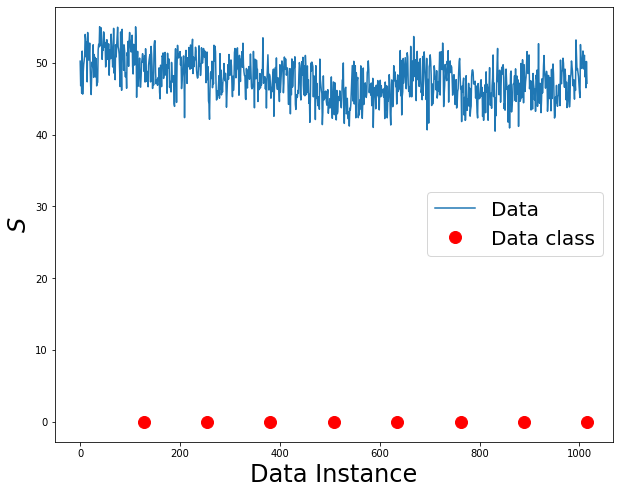

AUC=  0.1759253518507037


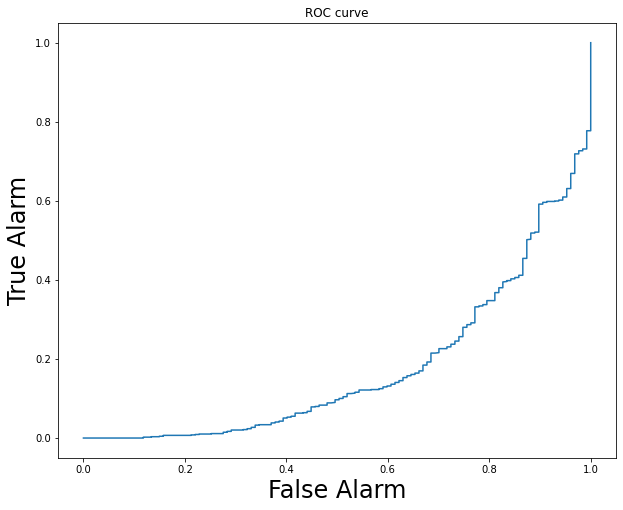

In [ ]:
TL_FT(DMT,WS_D,NS_D,Data_CLT,D,Spec,Precision,TL=False, Plot=True)

* Overal ROC and scores With FT

TL results with FT



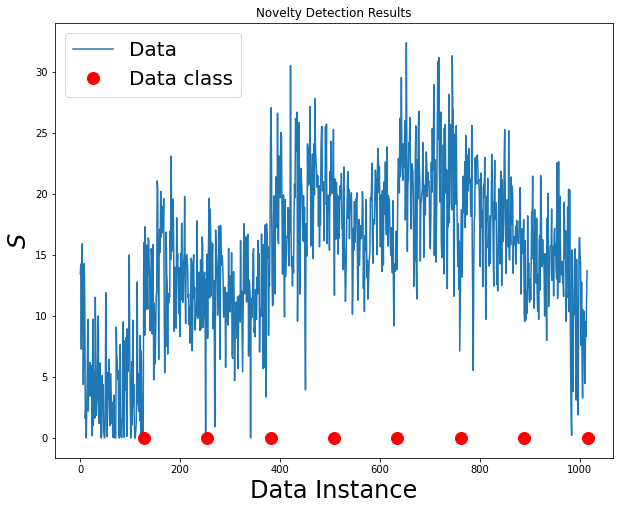

AUC=  0.958654774452406


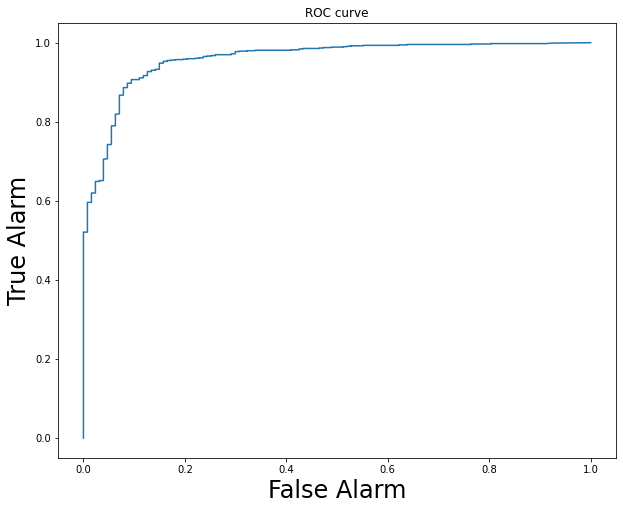

In [ ]:
TL_FT(DMT,WS_D,NS_D,Data_CLT,D,Spec,Precision,TL=True, Plot=True)

# ROC of all damage cases

DC1 TL results with FT
AUC=  0.9350393700787402 

DC2 TL results with FT
AUC=  0.9502337598425197 

DC3 TL results with FT
AUC=  0.9921259842519685 

DC4 TL results with FT
AUC=  0.9982775590551182 

DC5 TL results with FT
AUC=  0.9947096456692913 

DC6 TL results with FT
AUC=  0.9991387795275591 

DC7 TL results with FT
AUC=  0.9491264763779529 



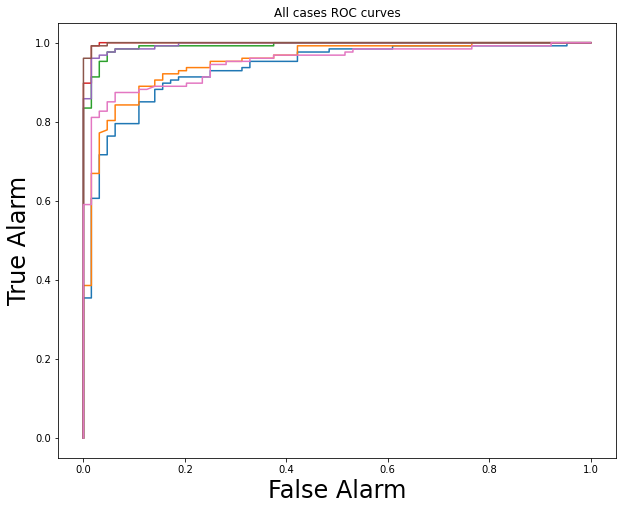

In [ ]:
ROC_All(DMT,WS_D,NS_D,E1T,Data_CLT,D,Spec,Precision,TL=True)